In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib notebook 


In [3]:
from py_pol import degrees, np
from py_pol.jones_vector import Jones_vector
from py_pol.jones_matrix import Jones_matrix
from py_pol.stokes import Stokes
from py_pol.mueller import Mueller
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)


In [3]:
from numpy import asarray, linspace, real, imag, exp, sin, cos, sqrt

## development: create array with data

In [4]:
from numpy.random import randn

In [5]:
j0=np.matrix(np.zeros((2,5)))
print(j0)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [6]:
j1=(np.matrix(randn(2,5))+1j*np.matrix(randn(2,5)))/np.sqrt(2)
j2=np.matrix(randn(2,5))

print(j1)

[[-0.48-0.38j  0.68+0.66j  0.  -0.13j -0.57+0.77j  0.6 +0.09j]
 [ 0.09-0.43j  0.01+0.13j  0.08+0.11j -0.06-0.14j -0.68+0.34j]]


### Añadir elementos

In [7]:
# TODO

### Pasar de 2D a lista

In [8]:
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio import np, sp, plt, mm, um, nm, degrees

In [9]:
x=np.linspace(-1*mm,1*mm,21)
y=np.linspace(-1*mm,1*mm,21)
wavelength=1*um

In [10]:
vs1=Vector_source_XY(x,y,wavelength)

In [11]:
vs1.gauss(A=1,
    r0=(0.0, 0.0),
    z=0.0,
    w0=(500,500),
    theta=0.0,
    phi=0.0,
    kind='radial',
    v=[1, 0])

### Jones

In [12]:
Ex=vs1.Ex
Ey=vs1.Ey

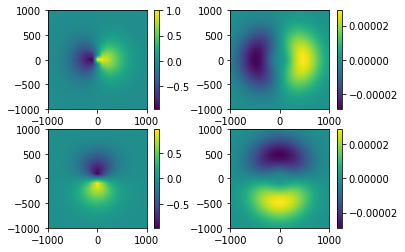

In [13]:
extension = [vs1.x.min(), vs1.x.max(), vs1.y.min(), vs1.y.max()]

fig=plt.figure()

plt.subplot(2,2,1)
h = plt.imshow(
    np.real(vs1.Ex),  interpolation='bilinear', aspect='auto', origin='lower', extent=extension)
plt.axis('scaled')
plt.colorbar()

plt.subplot(2,2,2)
h = plt.imshow(
    np.imag(vs1.Ex),  interpolation='bilinear', aspect='auto', origin='lower', extent=extension)
plt.axis('scaled')
plt.colorbar()


plt.subplot(2,2,3)
h = plt.imshow(
    np.real(vs1.Ey),  interpolation='bilinear', aspect='auto', origin='lower', extent=extension)
plt.axis('scaled')
plt.colorbar()


plt.subplot(2,2,4)
h = plt.imshow(
    np.imag(vs1.Ey),  interpolation='bilinear', aspect='auto', origin='lower', extent=extension)
plt.axis('scaled')
plt.colorbar()


### Stokes

((<matplotlib.image.AxesImage at 0x7f3daf286710>,
  <matplotlib.image.AxesImage at 0x7f3daf19b7b8>),
 None,
 None)

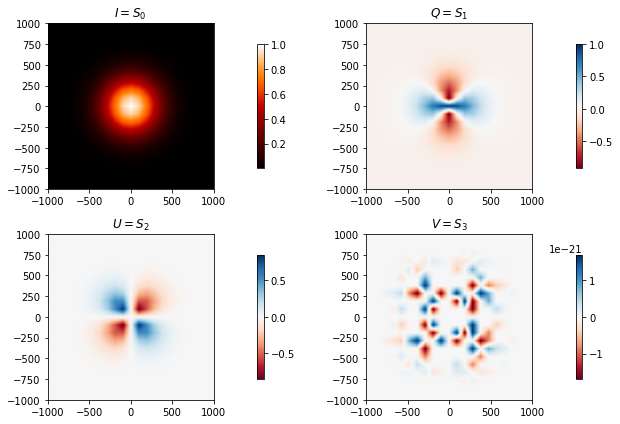

In [14]:
vs1.draw(field='E', kind='stokes')

In [15]:
CI, CQ, CU, CV = vs1.polarization_states(matrix=False)

print(CI)

Scalar_field_XY
 - x:  (21,),   y:  (21,),   u:  (21, 21)
 - xmin:       -1000.00 um,  xmax:      1000.00 um
 - ymin:       -1000.00 um,  ymax:      1000.00 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  0.00 deg, phase_max: 0.00 deg
 - wavelength: 1.00 um
 - date:       2019-09-14_09_53_19
 - info:       



Parámetros de la matriz de polarización cuadrada

In [16]:
s0=CI.u
s1=CQ.u
s2=CU.u
s3=CV.u

(-1000.0, 1000.0, -1000.0, 1000.0)

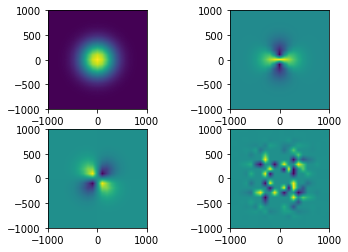

In [17]:
ext = [vs1.x.min(), vs1.x.max(), vs1.y.min(), vs1.y.max()]

fig=plt.figure()

plt.subplot(2,2,1)
h = plt.imshow(
    s0,  interpolation='bilinear', aspect='auto', origin='lower', extent=extension)
plt.axis('scaled')

plt.subplot(2,2,2)
h = plt.imshow(
    s1,  interpolation='bilinear', aspect='auto', origin='lower', extent=extension)
plt.axis('scaled')

plt.subplot(2,2,3)
h = plt.imshow(
    s2,  interpolation='bilinear', aspect='auto', origin='lower', extent=extension)
plt.axis('scaled')

plt.subplot(2,2,4)
h = plt.imshow(
    s3,  interpolation='bilinear', aspect='auto', origin='lower', extent=extension)
plt.axis('scaled')

### Suma, resta, multiplicacion 

In [18]:
j3=j1+j2
print(j3)

[[ 1.21-0.38j  0.15+0.66j -0.59-0.13j -0.01+0.77j  0.94+0.09j]
 [ 0.16-0.43j -0.09+0.13j  0.62+0.11j  0.34-0.14j -0.13+0.34j]]


In [19]:
j4=3*j1
print(j4)

[[-1.44-1.13j  2.03+1.97j  0.01-0.4j  -1.72+2.31j  1.8 +0.27j]
 [ 0.26-1.28j  0.04+0.38j  0.25+0.32j -0.17-0.43j -2.03+1.03j]]


## Rotacion de un array de jones vectors

¡funciona!

In [20]:
from py_pol.utils import rotation_matrix_Jones

In [21]:
rotation_matrix_Jones(angle=0)

matrix([[ 1.,  0.],
        [-0.,  1.]])

In [22]:
rotation_matrix_Jones(angle=45*degrees)*j1

matrix([[-0.28-0.57j,  0.49+0.55j,  0.06-0.02j, -0.45+0.44j, -0.05+0.31j],
        [ 0.4 -0.04j, -0.47-0.37j,  0.06+0.17j,  0.37-0.65j, -0.9 +0.18j]])

## Dibujo de vectores de Jones

In [23]:

def draw_ellipse_jones(j0, limit='', filename='', draw_arrow=False):
    """Draws polarization ellipse of Jones vector.

    Parameters:
        j0 (Jones_vector): Jones vector
        limit (float): limit for drawing. If empty itis obtained from ampltiudes.
        filename (str): name of filename to save the figure.
        draw_array (bool): draws chirality of ellipse

    Returns:
        fig (handle): handle to figure.
        ax (handle): handle to axis.
    """

    angles = linspace(0, 360 * degrees, 90)

    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in range(j0.shape[1]):
        E_field = asarray(j0[:,i])
        E0x = asarray(E_field[0]).squeeze()
        E0y = asarray(E_field[1]).squeeze()

        Ex = real(E0x * exp(1j * angles))
        Ey = real(E0y * exp(1j * angles))

        max_size = (sqrt(Ex**2 + Ey**2)).max() * 1.1

        if limit in [0, '', [], None]:
            limit = max_size * 1.25

        ax.plot(Ex, Ey, 'k', lw=2, label='polarized')
        if draw_arrow:
            ax.arrow(
                Ex[0],
                Ey[0],
                Ex[1] - Ex[0],
                Ey[1] - Ey[0],
                width=0,
                head_width=0.075 * max_size,
                fc='k',
                ec='k',
                length_includes_head=True)

    plt.axis('equal')
    plt.axis('square')
    plt.grid(True)
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_xlabel('$E_x$', fontsize=22)
    ax.set_ylabel('$E_y$', fontsize=22)
    plt.tight_layout()

    if filename not in (None, [], ''):
        plt.savefig(filename)
    return fig, ax



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3dad746630>)

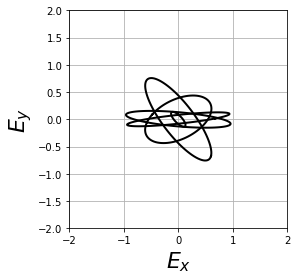

In [24]:
draw_ellipse_jones(j1, limit=2)

## Global phase

In [25]:
def remove_global_phase(M):
    """Function that transforms the Jones vector removing the global phase, so the first component of the elcric field is real and positive.

    Returns:
        E (2x1 numpy matrix): Jones vector."""

    a=M[0,:].A.flatten()
    ang=np.angle(a)
    b=np.asarray(M)

    s1=b*np.exp(-1j*ang)
    amp=s1[0,:]
    s2=s1/amp

    return s2

In [26]:
a=j1[0,:].A.flatten()
ang=np.angle(a)
b=np.asarray(j1)

s1=b*np.exp(-1j*ang)
amp=s1[0,:]
s2=s1/amp
print(a,'\n')
print(b,'\n')
print(s1,'\n')
print(amp,'\n')
print(s2,'\n')


[-0.48-0.38j  0.68+0.66j  0.  -0.13j -0.57+0.77j  0.6 +0.09j] 

[[-0.48-0.38j  0.68+0.66j  0.  -0.13j -0.57+0.77j  0.6 +0.09j]
 [ 0.09-0.43j  0.01+0.13j  0.08+0.11j -0.06-0.14j -0.68+0.34j]] 

[[ 0.61+0.j    0.94+0.j    0.13-0.j    0.96+0.j    0.61+0.j  ]
 [ 0.2 +0.39j  0.1 +0.08j -0.1 +0.09j -0.08+0.13j -0.62+0.44j]] 

[0.61+0.j 0.94+0.j 0.13-0.j 0.96+0.j 0.61+0.j] 

[[ 1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j  ]
 [ 0.32+0.64j  0.1 +0.09j -0.79+0.66j -0.09+0.14j -1.02+0.72j]] 



In [27]:
remove_global_phase(j1)

array([[ 1.  +0.j  ,  1.  +0.j  ,  1.  +0.j  ,  1.  +0.j  ,  1.  +0.j  ],
       [ 0.32+0.64j,  0.1 +0.09j, -0.79+0.66j, -0.09+0.14j, -1.02+0.72j]])

## Jones Matrix

In [28]:
jm0 = Jones_matrix('m0')
jm0.diattenuator_linear(angle=45*degrees)

matrix([[0.5+0.j, 0.5+0.j],
        [0.5+0.j, 0.5+0.j]])

In [29]:
jm0.get(kind='matrix')

matrix([[0.5+0.j, 0.5+0.j],
        [0.5+0.j, 0.5+0.j]])

In [30]:
jm0.get(kind='array')

array([[0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j]])

In [31]:
jm0.get(kind='line')

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

## Stokes vector

In [32]:
s0 = Stokes('s0')
s0.general_charac_angles(
    alpha=30*degrees, delay=90*degrees, intensity=1, pol_degree=0.95, is_depolarization=False)
s0.general_azimuth_ellipticity(azimuth=45*degrees, ellipticity=22.5*degrees,  intensity=1,  pol_degree=.95)
print(s0)

s0 = [+1.000; +0.000; +0.672; +0.672]



In [33]:
s0.get(kind='matrix')

matrix([[1.  ],
        [0.  ],
        [0.67],
        [0.67]])

In [34]:
s0.get(kind='array')

array([[1.  ],
       [0.  ],
       [0.67],
       [0.67]])

In [35]:
s0.get(kind='line')

array([1.  , 0.  , 0.67, 0.67])

## Mueller Matrix

In [36]:
mm1 = Mueller('M1')
mm1.diattenuator_linear(p1=1, p2=0, angle=45*degrees)
print(mm1)

M1 @45.00 deg = 
  [+0.5000, +0.0000, +0.5000, +0.0000]
  [+0.0000, +0.0000, +0.0000, +0.0000]
  [+0.5000, +0.0000, +0.5000, +0.0000]
  [+0.0000, +0.0000, +0.0000, +0.0000]



In [37]:
mm1.get(kind='matrix')

matrix([[0.5, 0. , 0.5, 0. ],
        [0. , 0. , 0. , 0. ],
        [0.5, 0. , 0.5, 0. ],
        [0. , 0. , 0. , 0. ]])

In [38]:
mm1.get(kind='array')

array([[0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. ]])

In [39]:
mm1.get(kind='line')

array([0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ,
       0. , 0. , 0. ])

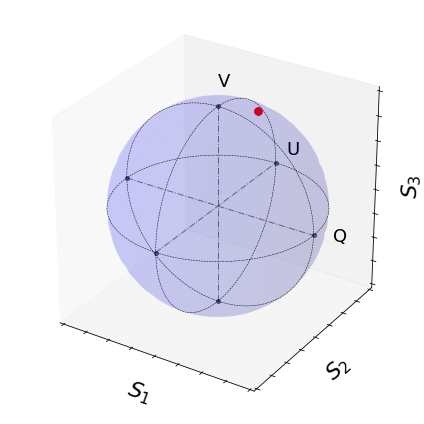

In [40]:
s0.draw_poincare()